<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Principal_Component_Analysis_Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Unsupervised Machine Learning:** `Principal Component Analysis`
---

Principal Component Analysis (PCA) is a multivariate analysis technique used to identify patterns and relationships between variables in a complex dataset. PCA takes a group of variables and transforms them into a new set of linearly independent components called principal components. Each principal component is a linear combination of the original variables and is ordered by the amount of variance explained by each component.

The basic concept of PCA is to reduce the dimensionality of variables in a complex dataset by transforming them into linearly independent principal components. PCA takes a data matrix consisting of n observations and p variabvles, the perform a linear transformation on the data to produce a number of new principal components that can describe most of the variability in the dataset.

Mathematically, PCA works by performing singular value decomposition (SVD) on a data matrix, resulting in a matrix of principal component factors. These principal components are ordered by the amount of variance explained by each component, and can be used to represent the data in a simpler and more efficient space.

In practice, PCA is used to speed up data analysis by eliminating unimportant variables and identifying relationships between existing variables. In this sense, PCA helps clarify the structure in complex data and allow researchers to make more precise and effective conclusions.

**Application: Breast Cancer Dataset**

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
pd.set_option('display.max_columns',None)

In [3]:
# Loading dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
print(f'Number of rows and columns {df.shape}')

Number of rows and columns (569, 30)


#### **Building a PCA using** `scikit-learn`

We now have all of the pieces to make a PCA using scikit learn library.

In [5]:
# Scaling
from sklearn.preprocessing import StandardScaler

# define feature
X = df


scaler = StandardScaler()
scaler.fit(X)

X_scale = scaler.transform(X)

X_scale[:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

We initialize sklearn.decomposition.PCA and instruct it to extract all principal components

In [6]:
from sklearn.decomposition import PCA

# define pca
pca = PCA(n_components=30)

pca.fit(X_scale)


# transfrom
X_pca = pca.transform(X_scale)
X_pca.shape

(569, 30)

We can print information about the analysis:

In [7]:
# information (variance) contained in pca
pca.explained_variance_

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04, 1.33279057e-04])

In [8]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [9]:
df_var = pd.DataFrame({
    'PC' : range(30),
    'Variance Ratio' : pca.explained_variance_ratio_,
    'CumSum' : pca.explained_variance_ratio_.cumsum()
})

df_var

,PC,Variance Ratio,CumSum
0,0,0.442720,0.442720
1,1,0.189712,0.632432
2,2,0.093932,0.726364
3,3,0.066021,0.792385
4,4,0.054958,0.847343
5,5,0.040245,0.887588
6,6,0.022507,0.910095
7,7,0.015887,0.925983
8,8,0.013896,0.939879
9,9,0.011690,0.951569


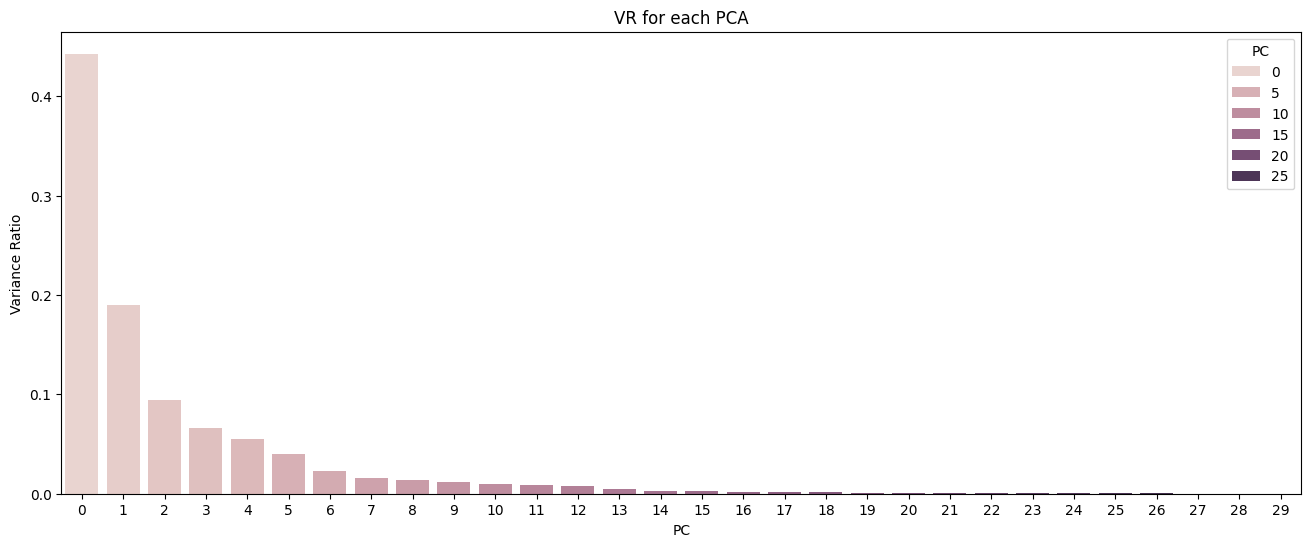

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
sns.barplot(data=df_var, x='PC',y='Variance Ratio',hue='PC')
plt.title('VR for each PCA')
plt.show()

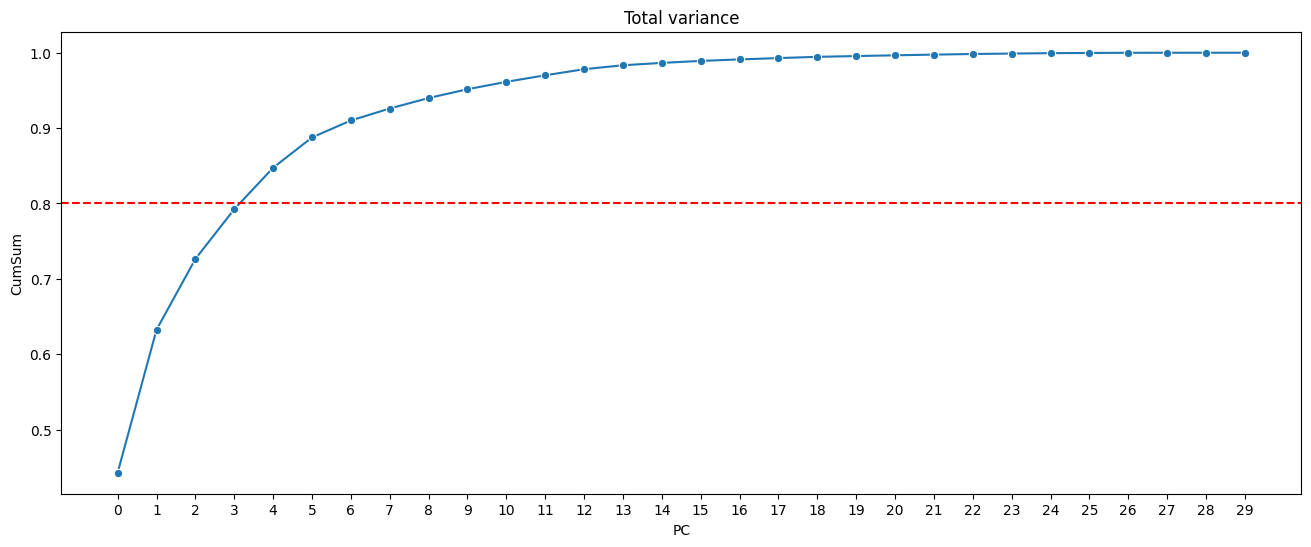

In [11]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_var, x='PC',y='CumSum',marker='o')
plt.axhline(y=0.8, color='red',linestyle='--')
plt.xticks(range(30))
plt.title('Total variance')
plt.show()

The first 5 Principal Components (PC0 - PC4) store 84.7% of the information (variance) from the initial data we have (30 features) while the first 2 Principal Components store 63.24% of the information.

Now we will try to extract two principal components to make data visualization easier.

In [12]:
# Use 2 PCA components

pca_2com = PCA(n_components=2)

pca_2com.fit(X_scale)

X_pca_2com = pca_2com.transform(X_scale)

X_pca_2com.shape

(569, 2)

In [14]:
print(pca_2com.explained_variance_ratio_.sum())

0.6324320765155944


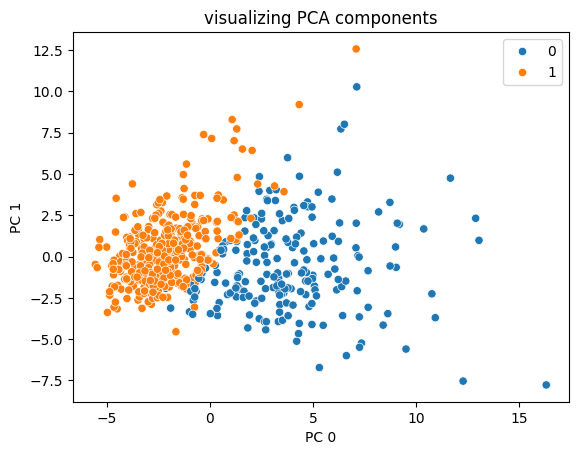

In [16]:
# PCA visualization
pc0 = X_pca_2com[:, 0]
pc1 = X_pca_2com[:, 1]

sns.scatterplot(x=pc0, y=pc1,hue=cancer['target'])
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.title('visualizing PCA components')
plt.show()

**Insight**

* Information (variance) stored in the 2 PCs above is 63.24%
* We reduce the number of dimensions (columns) from 30 to 2 dimensions, so we lose 36.76% of the information from the initial data
* But by only using 2 PCs, we can quite differentiate between malignant and benign cancer
* With 2 PCs, we can visualize with a scatterplot
* PCA can capture hidden patterns
* PCA can also eliminate multicollinearity

In [17]:
pd.DataFrame(X_pca_2com).corr()

,0,1
0,1.000000e+00,-1.705605e-18
1,-1.705605e-18,1.000000e+00


Then we can look at the coefficients of PC0 and PC1 and determine the important features of each component.

In [18]:
pd.DataFrame({
    'Feature' : X.columns,
    'coef pc 0' : pca_2com.components_[0],
    'coef pc 1' : pca_2com.components_[1]
}).sort_values('coef pc 0',ascending=False)

,Feature,coef pc 0,coef pc 1
7,mean concave points,0.260854,-0.034768
6,mean concavity,0.258400,0.060165
27,worst concave points,0.250886,-0.008257
5,mean compactness,0.239285,0.151892
22,worst perimeter,0.236640,-0.199878
26,worst concavity,0.228768,0.097964
20,worst radius,0.227997,-0.219866
2,mean perimeter,0.227537,-0.215181
23,worst area,0.224871,-0.219352
3,mean area,0.220995,-0.231077
